# Single-molecule transistor

In [1]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm

In [2]:
%matplotlib inline

# Model parameters

In [3]:
E=2.7182818284590452353602874713527

NDot=0.0
gaR=10*10.0**10
gaL=0.3*10.0**10
gbR=10*10.0**10
gbL=0.3*10.0**10
gN=0.001*10.0**10
gN1=0.001*10.0**10
slope=6
e=-1.602e-19
C1=1.0e-15
C2=1.0e-17
EaN = -0.623*e;
EbN = -0.587*e;
EaN1 = -0.410*e;
EbN1 = -0.487*e;
#EaN = 1.04*10.0**(-19)
#EbN = 9.4*10.0**(-20)
#EaN1 = 6.5*10.0**(-20)
#EbN1 = 7.5*10.0**(-20)
Beta=1.0/((1.38e-23)*20.0)#T=20K
Cg=-C2-C1/(1.0-slope)
Cs=Cg+C1+C2
EC=e*e/(2.0*Cs)

# Molecular transition rates and stationary probabilities

In [4]:
# Transition rates

def GN1NaL(Vg, Vb):
	return gaL/(1.0 + np.power(E,(-EaN + EaN1 + 2.0*EC*NDot - (-1.0 + C1/Cs)*e*Vb - (Cg*e*Vg)/Cs)*Beta )  )

def GN1NaR (Vg, Vb):
	return gaR/(1.0 + np.power(E,(-EaN + EaN1 + 2.0*EC*NDot - (C1*e*Vb)/Cs - (Cg*e*Vg)/Cs)*Beta))

def GN1Na (Vg, Vb):
	return GN1NaL(Vg,Vb) + GN1NaR(Vg,Vb)

def GNN1aL (Vg, Vb):
	return (1.0 - 1.0/(1.0 + np.power(E,(-EaN + EaN1 + 2.0*EC*NDot - (-1.0+ C1/Cs)*e*Vb - (Cg*e*Vg)/Cs)*Beta)))*gaL

def GNN1aR (Vg, Vb):
	return (1.0 - 1.0/(1.0 + np.power(E,(-EaN + EaN1 + 2.0*EC*NDot - (C1*e*Vb)/Cs - (Cg*e*Vg)/Cs)*Beta)))*gaR

def GNN1a (Vg, Vb):
	return GNN1aL(Vg,Vb) + GNN1aR(Vg,Vb)

def GN1NbL (Vg, Vb):
	return gbL/(1.0 + np.power(E,(-EbN + EbN1 + 2.0*EC*NDot - (-1.0 + C1/Cs)*e*Vb - (Cg*e*Vg)/Cs)*Beta))

def GN1NbR (Vg, Vb):
	return gbR/(1.0 + np.power(E,(-EbN + EbN1 + 2.0*EC*NDot - (C1*e*Vb)/Cs - (Cg*e*Vg)/Cs)*Beta))

def GN1Nb (Vg, Vb):
	return GN1NbL(Vg, Vb) + GN1NbR(Vg, Vb)

def GNN1bL (Vg, Vb):
	return (1.0 - 1.0/(1.0 + np.power(E,(-EbN + EbN1 + 2.0*EC*NDot - (-1.0 + C1/Cs)*e*Vb - (Cg*e*Vg)/Cs)*Beta)))*gbL

def GNN1bR (Vg, Vb):
	return (1.0 - 1.0/(1.0 + np.power(E,(-EbN + EbN1 + 2.0*EC*NDot - (C1*e*Vb)/Cs - (Cg*e*Vg)/Cs)*Beta)))*gbR

def GNN1b (Vg, Vb):
	return GNN1bL(Vg,Vb) + GNN1bR(Vg,Vb)

def GbaN (Vg, Vb):
	return (1.0 + 1.0/(-1.0 + np.power(E,(EaN - EbN)*Beta)))*gN

def GabN (Vg, Vb):
	return gN/(-1.0 + np.power(E,(EaN - EbN)*Beta))

def GbaN1 (Vg, Vb):
	return gN1/(-1.0 + np.power(E,(-EaN1 + EbN1)*Beta))

def GabN1 (Vg, Vb):
	return (1.0 + 1.0/(-1.0 + np.power(E,(-EaN1 + EbN1)*Beta)))*gN1


# Occupation probabilities (stationary solution)

def PaN (Vg, Vb):
	return (GabN1(Vg,Vb)*(GabN(Vg,Vb)+GN1Nb(Vg,Vb))*GNN1a(Vg,Vb)+GabN(Vg,Vb)*(GbaN1(Vg,Vb)+GNN1a(Vg,Vb))*GNN1b(Vg,Vb))/(GabN1(Vg,Vb)\
            *(GbaN(Vg,Vb)+GN1Na(Vg,Vb))*GN1Nb(Vg,Vb)+GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Nb(Vg,Vb))*GNN1a(Vg,Vb)+(GbaN1(Vg,Vb)*(GbaN(Vg,Vb)\
            +GN1Na(Vg,Vb))+GbaN(Vg,Vb)*GNN1a(Vg,Vb))*(GN1Nb(Vg,Vb)+GNN1b(Vg,Vb))+GabN(Vg,Vb)*(GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GabN1(Vg,Vb)*(GN1Na(Vg,Vb)\
            +GNN1a(Vg,Vb))+(GbaN1(Vg,Vb)+GN1Na(Vg,Vb)+GNN1a(Vg,Vb))*GNN1b(Vg,Vb)))

def PbN (Vg, Vb):
    return (GabN1(Vg,Vb)*GbaN(Vg,Vb)*GNN1a(Vg,Vb)+(GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GbaN(Vg,Vb)*(GbaN1(Vg,Vb)+GNN1a(Vg,Vb)))\
            *GNN1b(Vg,Vb))/(GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))*GN1Nb(Vg,Vb)+GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Nb(Vg,Vb))\
            *GNN1a(Vg,Vb)+(GbaN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))+GbaN(Vg,Vb)*GNN1a(Vg,Vb))*(GN1Nb(Vg,Vb)+GNN1b(Vg,Vb))\
            +GabN(Vg,Vb)*(GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GabN1(Vg,Vb)*(GN1Na(Vg,Vb)+GNN1a(Vg,Vb))+(GbaN1(Vg,Vb)+GN1Na(Vg,Vb)\
            +GNN1a(Vg,Vb))*GNN1b(Vg,Vb)))

def PaN1 (Vg, Vb):
    return (GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))*GN1Nb(Vg,Vb)+GabN(Vg,Vb)*GN1Na(Vg,Vb)*(GabN1(Vg,Vb)+GNN1b(Vg,Vb)))\
            /(GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))*GN1Nb(Vg,Vb)+GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Nb(Vg,Vb))*GNN1a(Vg,Vb)\
            +(GbaN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))+GbaN(Vg,Vb)*GNN1a(Vg,Vb))*(GN1Nb(Vg,Vb)+GNN1b(Vg,Vb))+GabN(Vg,Vb)\
            *(GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GabN1(Vg,Vb)*(GN1Na(Vg,Vb)+GNN1a(Vg,Vb))+(GbaN1(Vg,Vb)+GN1Na(Vg,Vb)+GNN1a(Vg,Vb))\
              *GNN1b(Vg,Vb)))
    
def PbN1 (Vg, Vb):
    return (GabN(Vg,Vb)*GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GbaN1(Vg,Vb)*GN1Na(Vg,Vb)*GN1Nb(Vg,Vb)+GbaN(Vg,Vb)*GN1Nb(Vg,Vb)*(GbaN1(Vg,Vb)+\
            GNN1a(Vg,Vb)))/(GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))*GN1Nb(Vg,Vb)+GabN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Nb(Vg,Vb))\
            *GNN1a(Vg,Vb)+(GbaN1(Vg,Vb)*(GbaN(Vg,Vb)+GN1Na(Vg,Vb))+GbaN(Vg,Vb)*GNN1a(Vg,Vb))*(GN1Nb(Vg,Vb)+GNN1b(Vg,Vb))\
            +GabN(Vg,Vb)*(GbaN1(Vg,Vb)*GN1Na(Vg,Vb)+GabN1(Vg,Vb)*(GN1Na(Vg,Vb)+GNN1a(Vg,Vb))+(GbaN1(Vg,Vb)+GN1Na(Vg,Vb)+GNN1a(Vg,Vb))\
            *GNN1b(Vg,Vb)))

def current (Vg, Vb): #here Vg is actually phi in mV
    return -e*10.0**9*(GN1NaL(10**-3*Cs/Cg*Vg,Vb)*PaN(10**-3*Cs/Cg*Vg,Vb)-GNN1aL(10**-3*Cs/Cg*Vg,Vb)*PaN1(10**-3*Cs/Cg*Vg,Vb)+\
              GN1NbL(10**-3*Cs/Cg*Vg,Vb)*PbN(10**-3*Cs/Cg*Vg,Vb)-GNN1bL(10**-3*Cs/Cg*Vg,Vb)*PbN1(10**-3*Cs/Cg*Vg,Vb))

def line1 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EaN+EaN1+2*EC*NDot)/e)/(C1-Cs)

def line2 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EaN+EaN1+2*EC*NDot)/e)/C1

def line3 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EbN+EbN1+2*EC*NDot)/e)/(C1-Cs)

def line4 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EbN+EbN1+2*EC*NDot)/e)/C1

def line5 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EaN+EbN1+2*EC*NDot)/e)/(C1-Cs)

def line6 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EaN+EbN1+2*EC*NDot)/e)/C1

def line7 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EbN+EaN1+2*EC*NDot)/e)/(C1-Cs)

def line8 (Vg): #Vg is actually phi in mV
    return (-Cs*10**-3*Vg+Cs*(-EbN+EaN1+2*EC*NDot)/e)/C1

# Results

## Current through the transistor

In [5]:
xs, ys = np.meshgrid(np.linspace(0,250,500), np.linspace(-1.0,1.0,500))
x=np.arange(0, 250, 0.01)
y=np.arange(-1.0,1.0,0.001)

In [6]:
#Current
data = current(xs,ys)

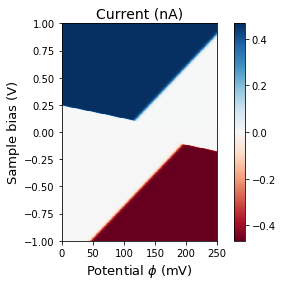

In [8]:
cmap = plt.get_cmap('RdBu')
plt.pcolormesh(xs, ys, data,cmap=cmap)
plt.title("Current (nA)",fontsize=14)
#plt.axis([xs.min(), xs.max(), ys.min(), ys.max()])
plt.colorbar()
plt.gca().set_aspect(175)
plt.xlabel('Potential $\phi$ (mV)',fontsize=13)
plt.ylabel('Sample bias (V)',fontsize=13)
plt.savefig('current_python.png',dpi=300,bbox_inches='tight')

## dI/dV curves

In [10]:
dIdV=-np.diff(data,1,0)*40

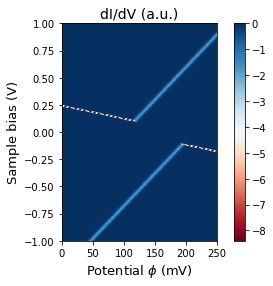

In [11]:
plt.title("dI/dV (a.u.)",fontsize=14)
cmap = plt.get_cmap('RdBu')
plt.pcolormesh(xs,ys,dIdV,cmap=cmap)
plt.colorbar()
plt.gca().set_aspect(175)
plt.xlabel('Potential $\phi$ (mV)',fontsize=13)
plt.ylabel('Sample bias (V)',fontsize=13)
plt.savefig('dIdV_python.png',dpi=300,bbox_inches='tight')

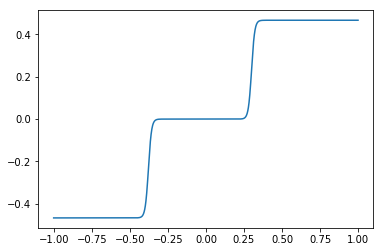

In [13]:
plt.plot(y,current(150,y))

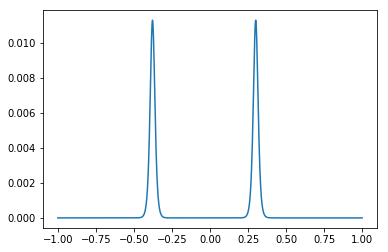

In [14]:
plt.plot(y[1:],np.diff(current(150,y)))

## Combined

In [15]:
#Current
data = current(xs,ys)

#Coulomb diamond lines
l1=line1(x)
l2=line2(x)
l3=line3(x)
l4=line4(x)

#Switching line
X, Y = np.meshgrid(x,y)
# left is one side of equation, right is the other
left = GbaN1(Cs/Cg*10**-3*X,Y)*GN1Na(Cs/Cg*10**-3*X,Y)-GabN1(Cs/Cg*10**-3*X,Y)*GN1Nb(Cs/Cg*10**-3*X,Y)
right = GabN(Cs/Cg*10**-3*X,Y)*GNN1b(Cs/Cg*10**-3*X,Y)-GbaN(Cs/Cg*10**-3*X,Y)*GNN1a(Cs/Cg*10**-3*X,Y)

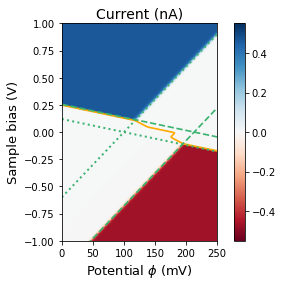

In [16]:
#Current
cmap = plt.get_cmap('RdBu')
plt.pcolormesh(xs, ys, data,cmap=cmap, vmin=-0.55, vmax=0.55)
plt.title("Current (nA)",fontsize=14)
#inset = plt.axes([.6,.6,.3,.3])
#plt.colorbar(cax=inset)
#plt.gca().set_aspect(175)
plt.colorbar()
plt.gca().set_aspect(175)
plt.xlabel('Potential $\phi$ (mV)',fontsize=13)
plt.ylabel('Sample bias (V)',fontsize=13)

#Coulomb diamond lines
plt.gca().set_aspect(175)
plt.plot(x,l1,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l2,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l3,color='#3cb371',linestyle=':',linewidth=2)
plt.plot(x,l4,color='#3cb371',linestyle=':',linewidth=2)
#plt.plot(x,0*x,'k:')
plt.axis([0,250,-1,1])
#plt.axis([0,250,-0.5,0.5])

#Switching line
plt.contour(X, Y, (left - right), [0], colors='#FFAA00',linewidths=1.7)

#plt.savefig('current_lines_python.png',bbox_inches='tight',dpi=300)
#plt.savefig('current.eps',bbox_inches='tight')
#plt.savefig('current.eps')

## Coercivity of the system

In [17]:
coerc=np.loadtxt('coercivity_large.txt')

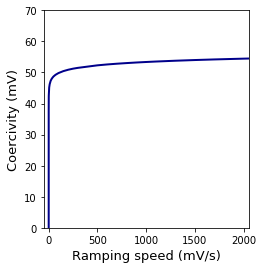

In [18]:
plt.gca().set_aspect(1450/13*20/70)
plt.plot([1000*p[0] for p in coerc], [1000*p[1] for p in coerc],color='#00008B',linestyle='-',linewidth=2)
plt.xlabel('Ramping speed (mV/s)',fontsize=13)
plt.ylabel('Coercivity (mV)',fontsize=13)
plt.xlim([-50,2050])
plt.ylim([0,70])
#plt.savefig('coercivity.png',dpi=300,bbox_inches='tight')
plt.savefig('coercivity_large.png',dpi=300,bbox_inches='tight')

In [19]:
pbincr=np.loadtxt('PbIncr.txt')
pbdecr=np.loadtxt('PbDecr.txt')

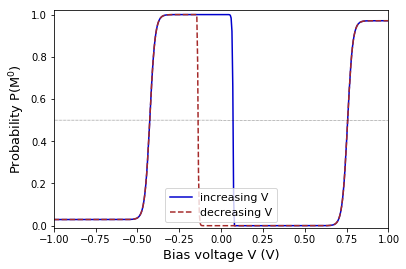

In [20]:
#plt.gca().set_aspect(1450/13*20/19)
plt.plot([p[0] for p in pbincr], [p[1] for p in pbincr],color='#0000cd',linestyle='-',linewidth=1.5,label='increasing V')
plt.plot([p[0] for p in pbdecr], [p[1] for p in pbdecr],color='#a52a2a',linestyle='--',linewidth=1.5,label='decreasing V')
plt.plot(x,0*x+0.5,'k:',linewidth=0.5)
plt.plot(-x,0*x+0.5,'k:',linewidth=0.5)
plt.xlabel('Bias voltage V (V)',fontsize=13)
plt.ylabel('Probability P(M$^0$)',fontsize=13)
plt.xlim([-1,1])
plt.legend(fontsize=11)
plt.ylim([-0.01,1.02])
#plt.savefig('probabilities.png',dpi=300,bbox_inches='tight')
plt.savefig('probabilities_thicker.pdf',dpi=300,bbox_inches='tight')

## Additional results

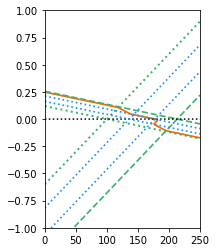

In [21]:
#Coulomb diamond lines
l1=line1(x)
l2=line2(x)
l3=line3(x)
l4=line4(x)

plt.gca().set_aspect(175)
plt.plot(x,l1,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l2,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l3,color='#3cb371',linestyle=':',linewidth=2)
plt.plot(x,l4,color='#3cb371',linestyle=':',linewidth=2)
plt.plot(x,0*x,'k:')
plt.axis([0,250,-1,1])

#Lines inside the parallelogram
l5=line5(x)
l6=line6(x)
l7=line7(x)
l8=line8(x)

plt.plot(x,l5,color='#1e90ff',linestyle=':',linewidth=1.7)
plt.plot(x,l6,color='#1e90ff',linestyle=':',linewidth=1.7)
plt.plot(x,l7,color='#1e90ff',linestyle=':',linewidth=1.7)
plt.plot(x,l8,color='#1e90ff',linestyle=':',linewidth=1.7)

#Switching line
X, Y = np.meshgrid(x,y)
# left is one side of equation, right is the other
left = GbaN1(Cs/Cg*10**-3*X,Y)*GN1Na(Cs/Cg*10**-3*X,Y)-GabN1(Cs/Cg*10**-3*X,Y)*GN1Nb(Cs/Cg*10**-3*X,Y)
right = GabN(Cs/Cg*10**-3*X,Y)*GNN1b(Cs/Cg*10**-3*X,Y)-GbaN(Cs/Cg*10**-3*X,Y)*GNN1a(Cs/Cg*10**-3*X,Y)
plt.gca().set_aspect(175)
plt.contour(X, Y, (left - right), [0], colors='#FF6600',linewidths=1.7)

plt.savefig('switching_line.png',bbox_inches='tight',dpi=300)

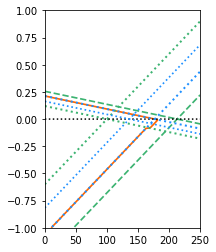

In [22]:
#Simplified switching line

X, Y = np.meshgrid(x,y)
# left is one side of equation, right is the other
left2 = GbaN(Cs/Cg*10**-3*X,Y)*GNN1a(Cs/Cg*10**-3*X,Y)
right2 = GabN(Cs/Cg*10**-3*X,Y)*GNN1b(Cs/Cg*10**-3*X,Y)

# left is one side of equation, right is the other
#left3 = GbaN1(Cs/Cg*10**-3*X,Y)*GN1Na(Cs/Cg*10**-3*X,Y)
#right3 = GabN1(Cs/Cg*10**-3*X,Y)*GN1Nb(Cs/Cg*10**-3*X,Y)

#Coulomb diamond lines
l1=line1(x)
l2=line2(x)
l3=line3(x)
l4=line4(x)

plt.gca().set_aspect(175)
plt.plot(x,l1,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l2,color='#3cb371',linestyle='--',linewidth=1.7)
plt.plot(x,l3,color='#3cb371',linestyle=':',linewidth=2)
plt.plot(x,l4,color='#3cb371',linestyle=':',linewidth=2)
plt.plot(x,0*x,'k:')
plt.axis([0,250,-1,1])

#Lines inside the parallelogram
l5=line5(x)
l6=line6(x)
l7=line7(x)
l8=line8(x)

plt.plot(x,l5,color='#1e90ff',linestyle=':',linewidth=1.7)
plt.plot(x,l6,color='#1e90ff',linestyle=':',linewidth=1.7)
plt.plot(x,l7,color='#1e90ff',linestyle=':',linewidth=2)
plt.plot(x,l8,color='#1e90ff',linestyle=':',linewidth=2)

#Switching line
plt.gca().set_aspect(175)
plt.contour(X, Y, (left2 - right2), [0], colors='#FF6600',linewidths=1.7)
#plt.contour(X, Y, (left3 - right3), [0], colors='#FF6600',linewidths=1.7)

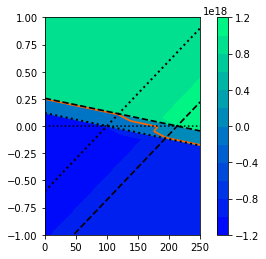

In [23]:
#Contour plot of the difference between probabilities Pa and Pb
cmap2 = plt.get_cmap('winter')
plt.gca().set_aspect(175)
plt.contourf(X, Y, left-right, 10, cmap=cmap2)
plt.colorbar()

#Coulomb diamond lines
plt.plot(x,l1,color='k',linestyle='--',linewidth=1.7)
plt.plot(x,l2,color='k',linestyle='--',linewidth=1.7)
plt.plot(x,l3,color='k',linestyle=':',linewidth=2)
plt.plot(x,l4,color='k',linestyle=':',linewidth=2)
plt.plot(x,0*x,'k:')
plt.axis([0,250,-1,1])

#Switching line
plt.gca().set_aspect(175)
plt.contour(X, Y, (left - right), [0], colors='#FF6600',linewidths=1.7)

plt.savefig('probabilities_20K.png',bbox_inches='tight',dpi=300)

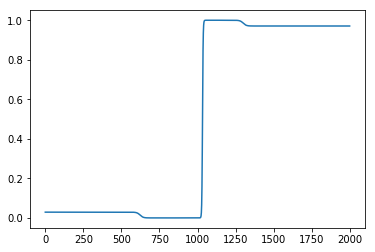

In [24]:
#Probability to be in b
plt.plot(PbN(Cs/Cg*0.15,y)+PbN1(Cs/Cg*0.15,y))

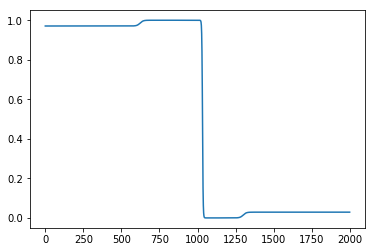

In [25]:
#Probability to be in a
plt.plot(PaN(Cs/Cg*0.15,y)+PaN1(Cs/Cg*0.15,y))
plt.savefig('Prob_a_20K.png',bbox_inches='tight',dpi=300)

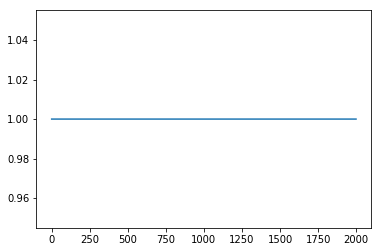

In [26]:
#Total probability -- checking
plt.plot(PbN(Cs/Cg*0.15,y)+PbN1(Cs/Cg*0.15,y)+PaN(Cs/Cg*0.15,y)+PaN1(Cs/Cg*0.15,y))

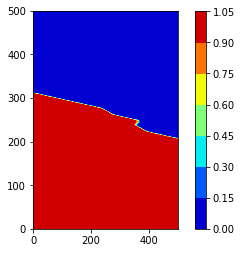

In [27]:
#Contour plot of one of the probabilities (Pa)
cmap3 = plt.get_cmap('jet')
plt.gca().set_aspect(1.5)
plt.contourf(PaN(10**-3*Cs/Cg*xs,ys)+PaN1(10**-3*Cs/Cg*xs,ys), cmap=cmap3)
plt.colorbar()
plt.savefig('Prob_a_contour_20K.png',bbox_inches='tight',dpi=300)